/var/folders/m8/7636l92s67q84k8h36102vj00000gn/T/ipykernel_2245/3935884410.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


            Value
Date             
2024-03-31  23.76
2024-03-30  25.03
2024-03-29  29.08
2024-03-28  37.89
2024-03-27  39.82


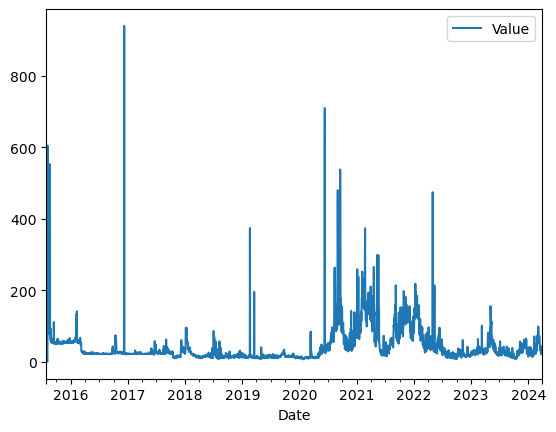

In [2]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
 
def parser(x):
 return datetime.strptime(x,'%Y-%m-%d')
 
series = read_csv('Dataset.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()
# load dataset
series.index = series.index.to_period('M')

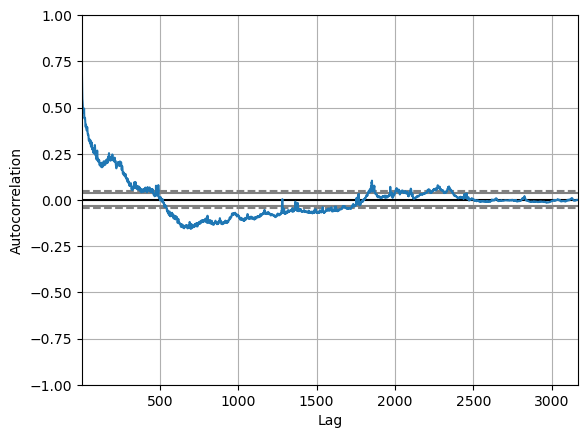

In [3]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

/var/folders/m8/7636l92s67q84k8h36102vj00000gn/T/ipykernel_2245/3260484545.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
/Users/spittignano/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/spittignano/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/spittignano/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                 3168
Model:               ARIMA(100, 1, 0)   Log Likelihood              -15716.748
Date:                Mon, 01 Apr 2024   AIC                          31635.497
Time:                        23:30:11   BIC                          32247.612
Sample:                             0   HQIC                         31855.067
                               - 3168                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5937      0.003   -181.772      0.000      -0.600      -0.587
ar.L2         -0.4805      0.009    -54.707      0.000      -0.498      -0.463
ar.L3         -0.3714      0.011    -33.040      0.0

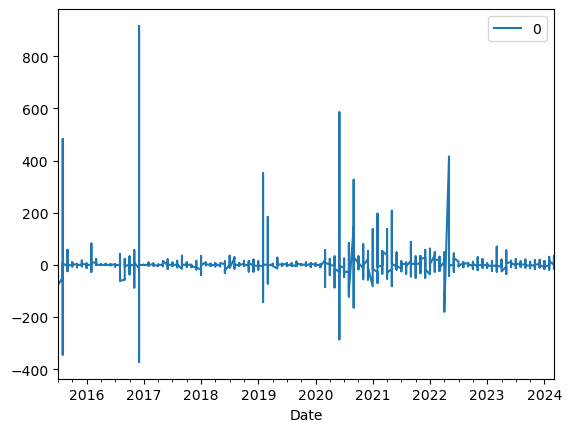

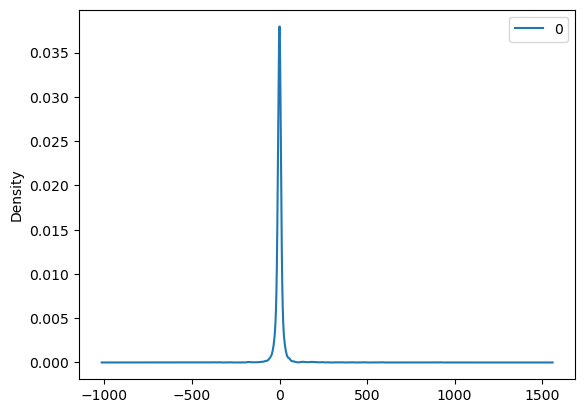

                 0
count  3168.000000
mean      0.227277
std      34.575070
min    -372.003584
25%      -4.497233
50%      -0.462130
75%       2.843945
max     915.859015


In [4]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
# fit model
model = ARIMA(series, order=(100,1,0)) # we can see that there is a positive correlation for the first 100 lags
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

/var/folders/m8/7636l92s67q84k8h36102vj00000gn/T/ipykernel_2245/418382411.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Test RMSE: 46.038


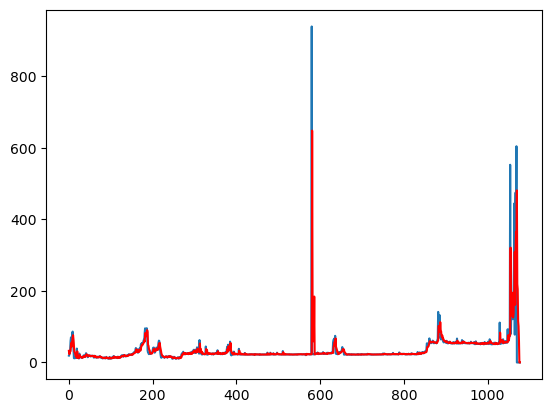

In [5]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
# series.index = series.index.to_period('M')
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 # print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [11]:
print(series)

         Value
Date          
2024-03  23.76
2024-03  25.03
2024-03  29.08
2024-03  37.89
2024-03  39.82
...        ...
2015-08   0.00
2015-08   0.00
2015-08   0.00
2015-07   0.00
2015-07   0.00

[3168 rows x 1 columns]


In [12]:
print(size)

2090
